In [1]:
import cv2
import os
import pandas as pd
import numpy as np
import random
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
from IPython.display import Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
training_path = "/content/drive/MyDrive/CatnDog"

i = 0

categories = []
imgs_names = []
features = []

for filename in os.listdir(training_path):
    imgs_names.append(filename)

    if 'dog' in filename:
        categories.append(0)
    elif 'cat'in filename:
        categories.append(1)
    else:
      categories.append(2)


    img = cv2.imread(os.path.join(training_path, filename))
    resized_img = cv2.resize(img, (128, 128))
    fd, hog_img = hog(resized_img, orientations = 9, pixels_per_cell = (8, 8),
                      cells_per_block = (2, 2), visualize = True, multichannel = True)
    features.append(fd)

    i += 1
    if i == 240:
        break

<ipython-input-4-1d1b2a5a927c>:22: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_img = hog(resized_img, orientations = 9, pixels_per_cell = (8, 8),


In [5]:
print(imgs_names)

['17 - Copy.jpg', '17.jpg', '16.jpg', '19 - Copy.jpg', '19.jpg', '2.jpg', '2 - Copy.jpg', '18.jpg', '18 - Copy.jpg', '16 - Copy.jpg', '14.jpg', '14 - Copy.jpg', '13 - Copy.jpg', '13.jpg', '15.jpg', '15 - Copy.jpg', '1.jpg', '10 - Copy.jpg', '10.jpg', '1 - Copy.jpg', '42.jpg', '4 - Copy.jpg', '41.jpg', '43.jpg', '4.jpg', '39.jpg', '40.jpg', '33.jpg', '38.jpg', '34.jpg', '32.jpg', '37.jpg', '36.jpg', '31.jpg', '30.jpg', '27.jpg', '29.jpg', '3 - Copy.jpg', '23.jpg', '3.jpg', '20.jpg', '22.jpg', '22 - Copy.jpg', '24.jpg', '25.jpg', '21.jpg', '21 - Copy.jpg', '20 - Copy.jpg', 'dog.4811.jpg', 'dog.4803.jpg', 'dog.4807.jpg', 'dog.4802.jpg', 'dog.4805.jpg', 'dog.4804.jpg', 'dog.4799.jpg', 'cat.98.jpg', 'cat.189.jpg', 'cat.194.jpg', 'cat.182.jpg', 'cat.197.jpg', 'cat.188.jpg', 'dog.4801.jpg', 'cat.195.jpg', 'cat.193.jpg', 'cat.99.jpg', 'cat.196.jpg', 'cat.192.jpg', 'cat.191.jpg', 'cat.190.jpg', 'cat.183.jpg', 'cat.185.jpg', 'cat.186.jpg', 'cat.187.jpg', 'cat.184.jpg', 'cat.181.jpg', 'cat.180.jp

In [6]:
print(categories)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
print(features[0])

[0.08802627 0.3131684  0.37929269 ... 0.20060835 0.25768357 0.21779203]


In [8]:
len(categories)

240

In [9]:
len(features)

240

In [10]:
X = features
Y = categories
C = 0.1
svc = svm.SVC(kernel='poly', C=C,gamma=10).fit(X, Y)

In [11]:
predictions = svc.predict(X)

In [12]:
accuracy = np.mean(predictions == Y)
accuracy

1.0

In [13]:
i = 0

test_names = []
test_features = []
test_categories = []
for filename in os.listdir(training_path):
    if(i > 240):
        test_names.append(filename)
        if 'dog' in filename:
             test_categories.append(0)
        elif 'cat'in filename:
              test_categories.append(1)
        else:
              test_categories.append(2)



        img = cv2.imread(os.path.join(training_path, filename))
        resized_img = cv2.resize(img, (128, 128))
        fd, hog_img = hog(resized_img, orientations = 9, pixels_per_cell = (8, 8),
                          cells_per_block = (2, 2), visualize = True, multichannel = True)
        test_features.append(fd)

    i += 1

    if i == 300:
        break

<ipython-input-13-83f9ea6bbb36>:20: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_img = hog(resized_img, orientations = 9, pixels_per_cell = (8, 8),


In [14]:
test_X = test_features
test_Y = test_categories


test_predictions = svc.predict(test_X)

In [15]:
test_categories

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [16]:
p=svc.predict(test_X)
print(p)

[0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 0 1 1 1 1 2 0 1 0 1 1 1 1 1 2 0 2 0 2 2 0 1]


In [17]:
accuracy = np.mean(test_predictions == test_Y)
accuracy


0.4067796610169492

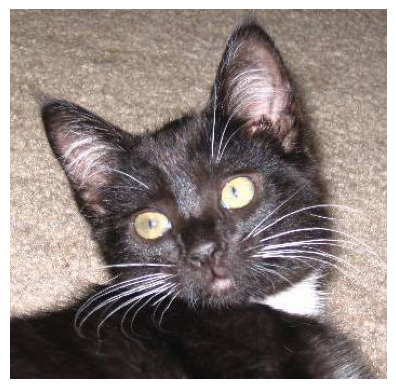

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/drive/MyDrive/Dogs & Cats Images/train/cat.102.jpg" 

img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()


In [20]:
if(test_predictions[0] == 0):
  print("dog")
else:
  print("cat")

dog


In [21]:
print(test_predictions)

[0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 0 1 1 1 1 2 0 1 0 1 1 1 1 1 2 0 2 0 2 2 0 1]


In [22]:
imgg = cv2.imread("/content/drive/MyDrive/Dogs & Cats Images/train/dog.4772.jpg" )
resized_img = cv2.resize(imgg, (128, 128))
fd, hog_img = hog(resized_img, orientations = 9, pixels_per_cell = (8, 8), cells_per_block = (2, 2), visualize = True, multichannel = True)
features.append(fd)

<ipython-input-22-ceed9b464fdb>:4: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_img = hog(resized_img, orientations = 9, pixels_per_cell = (8, 8), cells_per_block = (2, 2), visualize = True, multichannel = True)


In [23]:
x=features
test_predictions = svc.predict(x)

In [24]:

if test_predictions[0] == 0:
    print("It's a cat!")
else:
    print("It's a dog!")

It's a dog!


In [25]:
print(test_predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 2 2 1 1 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [26]:
import joblib

In [27]:
joblib.dump(svc, 'catndog.pkl')

['catndog.pkl']

In [28]:
test_Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]